## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading data from the given Excel File and Display.

In [3]:
df = pd.read_csv("C:/Users/P. R. RAJAGOPAL/Desktop/Ananth/Proj/Customer Segmentation/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Display Gender Distribution Using Bar Graph (barplot)

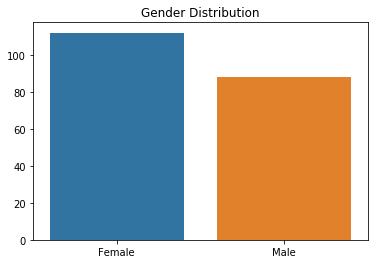

In [3]:
genders = df.Gender.value_counts()
plt.figure()
plt.title("Gender Distribution")
sns.barplot(x=genders.index, y=genders.values)
plt.show()

### Display Age Using Distribution Graph (distplot)

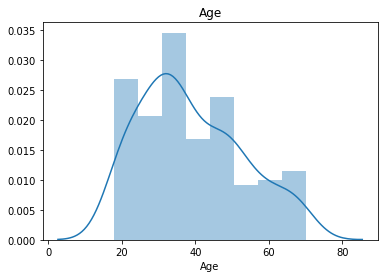

In [4]:
plt.figure()
plt.title("Age")
g = sns.distplot(df["Age"])
plt.show()

### Display Annual Income Using Distribution Graph (distplot)

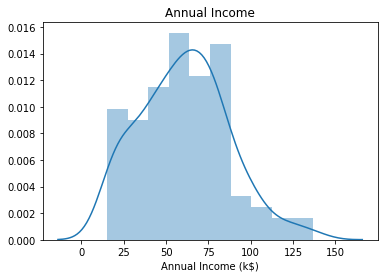

In [5]:
plt.figure()
plt.title("Annual Income")
g = sns.distplot(df["Annual Income (k$)"])
plt.show()

### Display Spending Scores Using Distribution Graph (distplot)

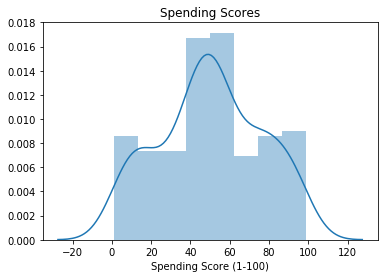

In [6]:
plt.figure()
plt.title("Spending Scores")
g = sns.distplot(df["Spending Score (1-100)"])
plt.show()

## Bar Graph to check the distribution of number of customers in each age group.

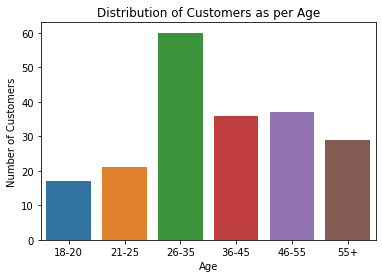

In [7]:
age_18_20 = df.Age[(df.Age <= 20) & (df.Age >= 18)]
age_21_25 = df.Age[(df.Age <= 25) & (df.Age >= 21)]
age_26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age_36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age_46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age_55_plus = df.Age[df.Age >= 56]

x = ["18-20","21-25","26-35","36-45","46-55","55+"]
y = [len(age_18_20.values), len(age_21_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55_plus.values)]

sns.barplot(x=x, y=y)
plt.title("Distribution of Customers as per Age")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

## Bar Graph to check the number of customers as per the Spending Scores.

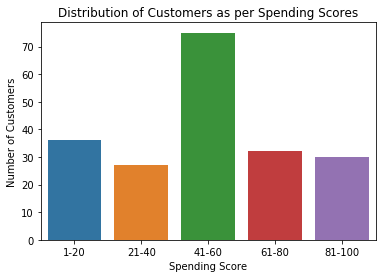

In [12]:
spend_score_1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
spend_score_21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
spend_score_41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
spend_score_61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
spend_score_81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

spend_score_x = ["1-20", "21-40", "41-60", "61-80", "81-100"]
spend_score_y = [len(spend_score_1_20.values), len(spend_score_21_40.values), len(spend_score_41_60.values), len(spend_score_61_80.values), len(spend_score_81_100.values)]

sns.barplot(x=spend_score_x, y=spend_score_y)
plt.title("Distribution of Customers as per Spending Scores")
plt.xlabel("Spending Score")
plt.ylabel("Number of Customers")
plt.show()

## Bar Graph to check the number of customers as per the Annual Income.

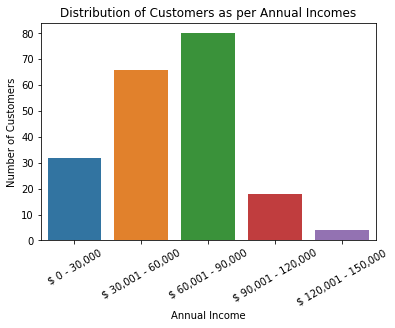

In [13]:
ann_inc_0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ann_inc_31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ann_inc_61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ann_inc_91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ann_inc_121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

ann_inc_x = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
ann_inc_y = [len(ann_inc_0_30.values), len(ann_inc_31_60.values), len(ann_inc_61_90.values), len(ann_inc_91_120.values), len(ann_inc_121_150.values)]

plot = sns.barplot(x=ann_inc_x, y=ann_inc_y)
plot.set_xticklabels(plot.get_xticklabels(), rotation=30)
plt.title("Distribution of Customers as per Annual Incomes")
plt.xlabel("Annual Income")
plt.ylabel("Number of Customers")
plt.show()

# For Choosing right number of clusters:

##### The number of clusters that we choose for a given dataset cannot be random. Each cluster is formed by calculating and comparing the distances of data points within a cluster to its centroid. An ideal way to figure out the right number of clusters would be to calculate the Within-Cluster-Sum-of-Squares (WCSS). 

### WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids.

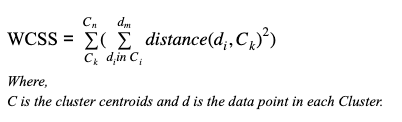

##### Plotting WCSS against the the number of clusters or K - Value to find the required number of clusters value. 

##### WCSS measures sum of distances of observations from their cluster centroids.

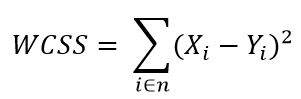

##### where yi is centroid for observation xi. The main goal is to maximize number of clusters such that in the limiting case each data point becomes cluster centroid of own cluster.

# Elbow method

#### We can find the optimum value for K using an Elbow point graph. We randomly initialise the K-Means algorithm for a range of K values and will plot it against the WCSS for each K value.

##### The resulting graph would look something like what’s shown below:


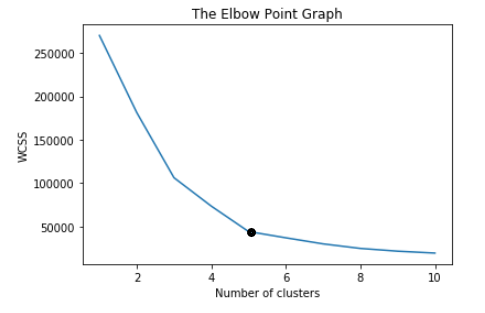

##### For the above-given graph, the optimum value for K would be 5. As we can see that with an increase in the number of clusters the WCSS value decreases. We select the value for K on the basis of the rate of decrease in WCSS. For example, from cluster 1 to 2 to 3 in the above graph we see a sudden and huge drop in WCSS. After 5 the drop is minimal and hence we chose 5 to be the optimal value for K.


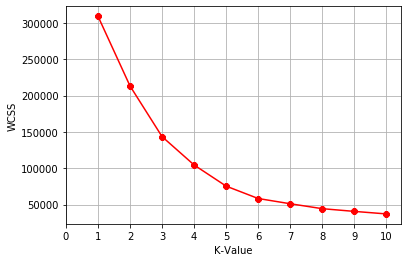

In [14]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state = 42)
    kmeans.fit(df.iloc[:,2 :])
    wcss.append(kmeans.inertia_)
plt.grid()
plt.plot(range(1,11), wcss, color="red", marker ="8")
plt.xlabel("K-Value")
plt.xticks(np.arange(11))
plt.ylabel("WCSS")
plt.show()

### 3D plot to visualize the Spending Scores of the Customers with their Annual Income is plotted below. The data points are separated into 5 classes since we have considered K to be 5 and these are represented in different colours as shown in the 3D plot.

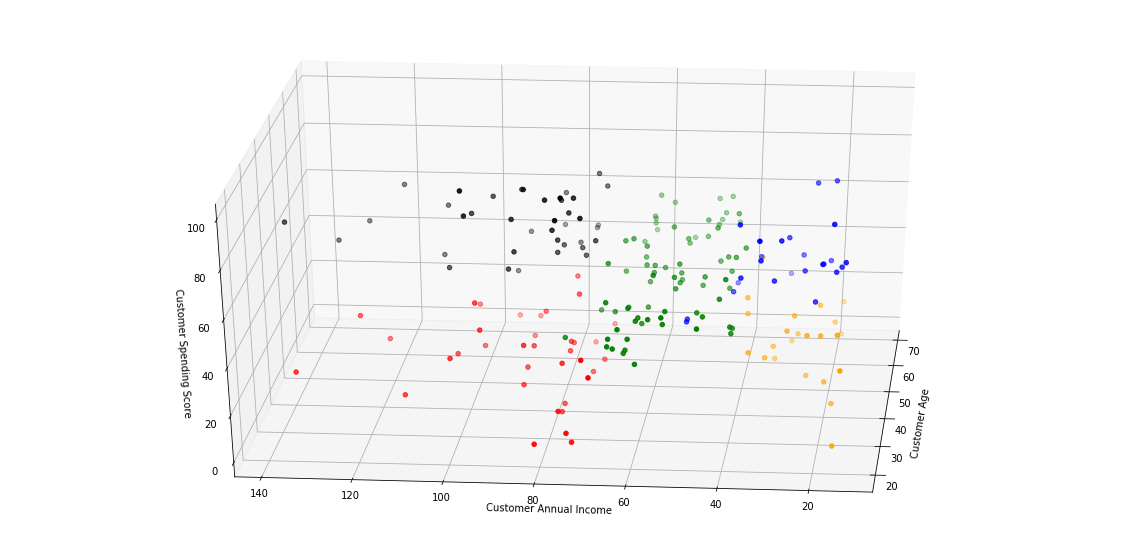

In [11]:
k = KMeans(n_clusters = 5)
clusters = k.fit_predict(df.iloc[:,2:])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize=(20,10))
a = fig.add_subplot(projection='3d')
a.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='red')
a.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='blue')
a.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green')
a.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='black')
a.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='orange')
a.view_init(30, 185)
plt.xlabel("Customer Age")
plt.ylabel("Customer Annual Income")
a.set_zlabel('Customer Spending Score')
plt.show()